# Project:  Radio Galaxy classification 


In [ ]:
### importing packgages 
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import  Activation 
from tensorflow.keras import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation ,AveragePooling2D
import h5py
import warnings
from keras import backend as K
import os
from keras.layers import LeakyReLU
import timeit
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Model
import seaborn as sns

In [ ]:
from google.colab import drive # importing the data from drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/My\ Drive/31.zip #  unziping the folder 

Archive:  gdrive/My Drive/31.zip
replace 31/First _FRII/4C44.19.png_1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 31/First _FRII/4C44.19.png_1.png  
  inflating: 31/First _FRII/3C272.png_0.png  
  inflating: 31/First _FRII/TXS1519+228.png_1.png  
  inflating: 31/First _FRII/TXS1525+210.png_1.png  
  inflating: 31/First _FRII/1423-0276.png_1.png  
  inflating: 31/First _FRII/3C323.png_0.png  
  inflating: 31/First _FRII/4C18.43.png_0.png  
  inflating: 31/First _FRII/1432-0305.png_0.png  
  inflating: 31/First _FRII/4C43.21.png_0.png  
  inflating: 31/First _FRII/TXS1440+189.png_0.png  
  inflating: 31/First _FRII/QSOB1442+117.png_1.png  
  inflating: 31/First _FRII/4C11.45.png_1.png  
  inflating: 31/First _FRII/TXS1548+274.png_0.png  
  inflating: 31/First _FRII/TXS1548+274.png_1.png  
  inflating: 31/First _FRII/1409-0307.png_0.png  
  inflating: 31/First _FRII/1409-0307.png_1.png  
  inflating: 31/First _FRII/3C322.png_1.png  
  inflating: 31/First _FRII/TXS1415+013.pn

In [ ]:
!unzip gdrive/My\ Drive/3.zip # unziping the   folder 


Archive:  gdrive/My Drive/3.zip
replace 3/First _FRII/TXS1408003.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 3/First _FRII/TXS1408003.png  
  inflating: 3/First _FRII/3C220.2.png  
  inflating: 3/First _FRII/3C223.png  
  inflating: 3/First _FRII/TXS1406007.png  
  inflating: 3/First _FRII/3C212.png  
  inflating: 3/First _FRII/3C244.1.png  
  inflating: 3/First _FRII/TXS1541+143.png  
  inflating: 3/First _FRII/TXS1437001.png  
  inflating: 3/First _FRII/TXS1541+230.png  
  inflating: 3/First _FRII/TXS1536+144.png  
  inflating: 3/First _FRII/TXS1434028.png  
  inflating: 3/First _FRII/TXS1430002.png  
  inflating: 3/First _FRII/3C223.1.png  
  inflating: 3/First _FRII/TXS1416000.png  
  inflating: 3/First _FRII/TXS1432020.png  
  inflating: 3/First _FRII/TXS1541+136.png  
  inflating: 3/First _FRII/3C227.png  
  inflating: 3/First _FRII/TXS1540+241.png  
  inflating: 3/First _FRII/TXS1416022.png  
  inflating: 3/First _FRII/WB1504+1618.png  
  inflating: 3/First _FRII/3

# Spliting the data

In [ ]:
image_size = (150, 150)
batch_size = 32

# The tf.keras.preparation keras dataset preprocessing functions help us to access our raw data on disk to a tf.data. 
#An object that can be utilized to train a model is a dataset.
# Therefore we use  a built in function   in Keras to  split our data  into  training and validation 
train_data= tf.keras.preprocessing.image_dataset_from_directory("31",
    shuffle=True,
    validation_split=0.1,
    subset="training",
    color_mode="grayscale",
    seed=1337, 
    image_size=image_size, 
    batch_size=batch_size 
)
 #   is the name of the folder where the  our data is store
    # spliting  the data into into  training  
    #thus we train 890% of our data  and  the remainimg  10% is for  validate

validation_data = tf.keras.preprocessing.image_dataset_from_directory("31",
    shuffle=True,
    validation_split=0.1,
    subset="validation",
   color_mode="grayscale",  #  to have channel of 1 
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)


test_data = tf.keras.preprocessing.image_dataset_from_directory("3",
   color_mode="grayscale",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)




Found 1590 files belonging to 2 classes.
Using 1431 files for training.
Found 1590 files belonging to 2 classes.
Using 159 files for validation.
Found 100 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
print(class_names)   # viewing the   classses found in the training  data 

['Bent_Tail', 'First _FRII']


In [ ]:
class_name = test_data.class_names
print(class_name) #  viewing images found in 

['Bent_Tail', 'First _FRII']


 ## isualise examples from the dataset
Run the cell below multiple times to see various images. (They might look a bit blurry because we've blown up the small images.)

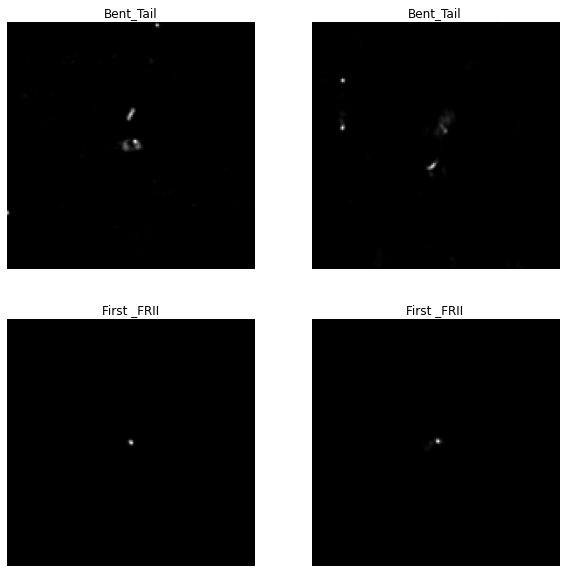

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(4):
      ax = plt.subplot(2, 2, i + 1)
      plt.imshow(images[i].numpy().astype("float32").squeeze() ,cmap='gray')
      plt.title( class_names [int(labels[i])])
      plt.axis("off")

## Standarlize

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Create a   CNN   Model

In [ ]:
# Define the convolutinal part of the model architecture using Keras Layers.
model = tf.keras.models.Sequential([#augmented_images ,                            
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(150, 150, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters= 96, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Conv2D(filters= 196, kernel_size=(3, 3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPooling2D( pool_size=(2, 2)),
])


How many parameters are there in the convolutional part of the architecture? We can easily inspect this using the model summary function in Keras:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 96)        55392     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 96)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       110720    
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 196)       2

Now we add a fully-connected part. Note that we also add "Dropout" after the first fully-connected layer. Dropout is a regularization technique which randomly zeros out ("drops") connections between neurons, and it was one of the key innovations of the AlexNet paper in 2012.

In [ ]:
model.add(tf.keras.layers.Flatten())  # Flatten "squeezes" a 3-D volume down into a single vector.
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax)) # change  If using binary  or all versus all 




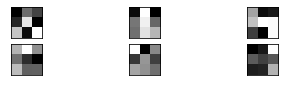

In [ ]:
from matplotlib import pyplot

filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()
  

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 96)        55392     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 96)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       110720    
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 196)       2

###Visualizing the model

Let's build a flow-diagram of the model we've constructed to see how information flows between the different layers.

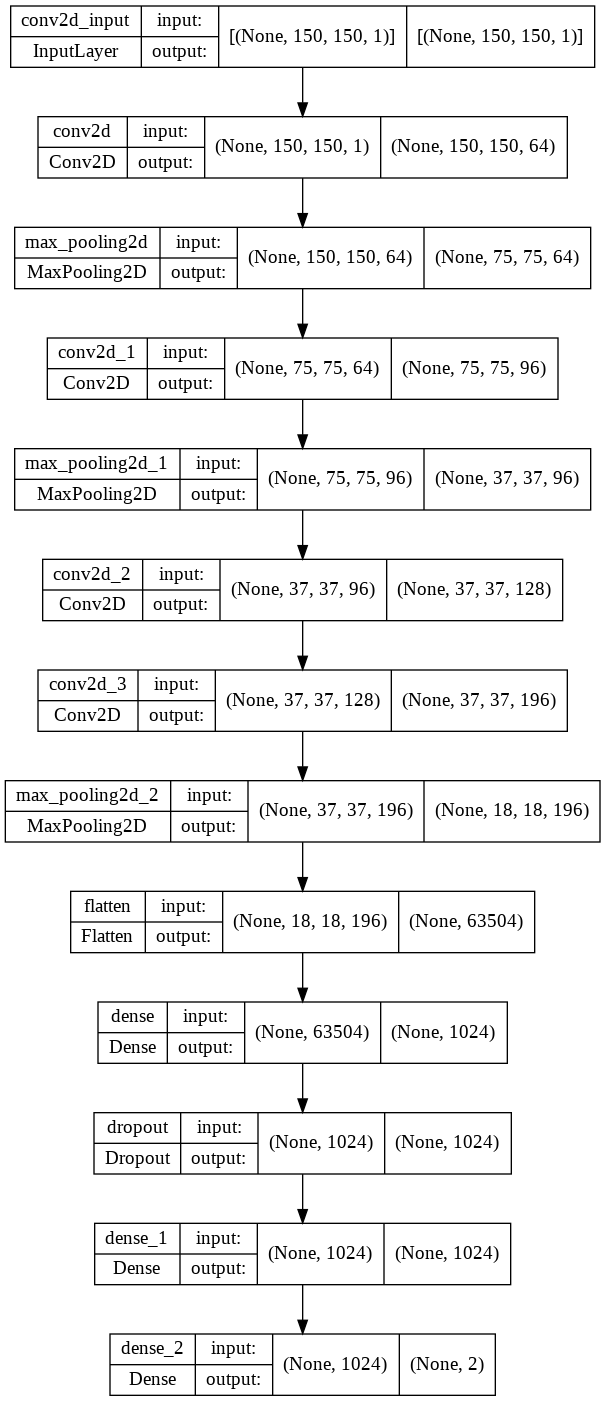

In [ ]:
tf.keras.utils.plot_model(model, to_file='small_lenet.png', show_shapes=True, show_layer_names=True)
display.display(display.Image('small_lenet.png'))


### Training and Validating the model


In [ ]:
batch_size = 32
num_epochs = 10  # The number of epochs (full passes through the data) to train for
from tensorflow.keras.callbacks import EarlyStopping #  to stop training if the model is overfiting 
callbacks = EarlyStopping(monitor='loss',patience=20, restore_best_weights=True) 

# Compiling the model adds a loss function, optimiser and metrics to track during training
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

# The fit function allows you to fit the compiled model to some training data
history = model.fit(x=train_data, 
          batch_size=batch_size, 
          epochs=num_epochs, callbacks=callbacks,
          validation_data=validation_data)  # training the model 



Epoch 1/35
45/45 [==============================] - 17s 112ms/step - loss: 0.4931 - accuracy: 0.8442 - val_loss: 0.2319 - val_accuracy: 0.9119
Epoch 2/35
45/45 [==============================] - 3s 74ms/step - loss: 0.1685 - accuracy: 0.9434 - val_loss: 0.1700 - val_accuracy: 0.9371
Epoch 3/35
45/45 [==============================] - 3s 74ms/step - loss: 0.0857 - accuracy: 0.9686 - val_loss: 0.1089 - val_accuracy: 0.9560
Epoch 4/35
45/45 [==============================] - 3s 75ms/step - loss: 0.0331 - accuracy: 0.9860 - val_loss: 0.1972 - val_accuracy: 0.9686
Epoch 5/35
45/45 [==============================] - 3s 70ms/step - loss: 0.0449 - accuracy: 0.9846 - val_loss: 0.0665 - val_accuracy: 0.9623
Epoch 6/35
45/45 [==============================] - 3s 71ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.1195 - val_accuracy: 0.9623
Epoch 7/35
45/45 [==============================] - 3s 71ms/step - loss: 0.0340 - accuracy: 0.9916 - val_loss: 0.1528 - val_accuracy: 0.9686
Epoch 8/35


In [ ]:
# Getting train accuracy and loss
train_loss, train_acc = model.evaluate(train_data)
print('Train loss: {} Train Acc: {}'.format(train_loss, train_acc))
print("train_acc : {:5.2f}%".format(100*train_acc)) 

45/45 [==============================] - 1s 24ms/step - loss: 7.8460e-07 - accuracy: 1.0000
Train loss: 7.846049356885487e-07 Train Acc: 1.0
train_acc : 100.00%


In [ ]:
# Getting Validation  accuracy and loss
val_loss, val_acc = model.evaluate(validation_data)
print('Test loss: {} Test Acc: {}'.format(val_loss, val_acc))
print("val_acc : {:5.2f}%".format(100*val_acc)) 

5/5 [==============================] - 0s 24ms/step - loss: 0.2962 - accuracy: 0.9811
Test loss: 0.2962452471256256 Test Acc: 0.9811320900917053
val_acc : 98.11%


In [ ]:
# Getting test  accuracy and loss
test_loss, test_acc = model.evaluate(test_data)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))
print(" test_acc : {:5.2f}%".format(100*test_acc))

4/4 [==============================] - 0s 78ms/step - loss: 0.9480 - accuracy: 0.9400
Test loss: 0.9479954242706299 Test Acc: 0.9399999976158142
 test_acc : 94.00%


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
accuracies = cross_val_score(model, train_data, validation_data, cv = 5, scoring= "accuracy")

TypeError: ignored

## VIsulazation of the loss Curves

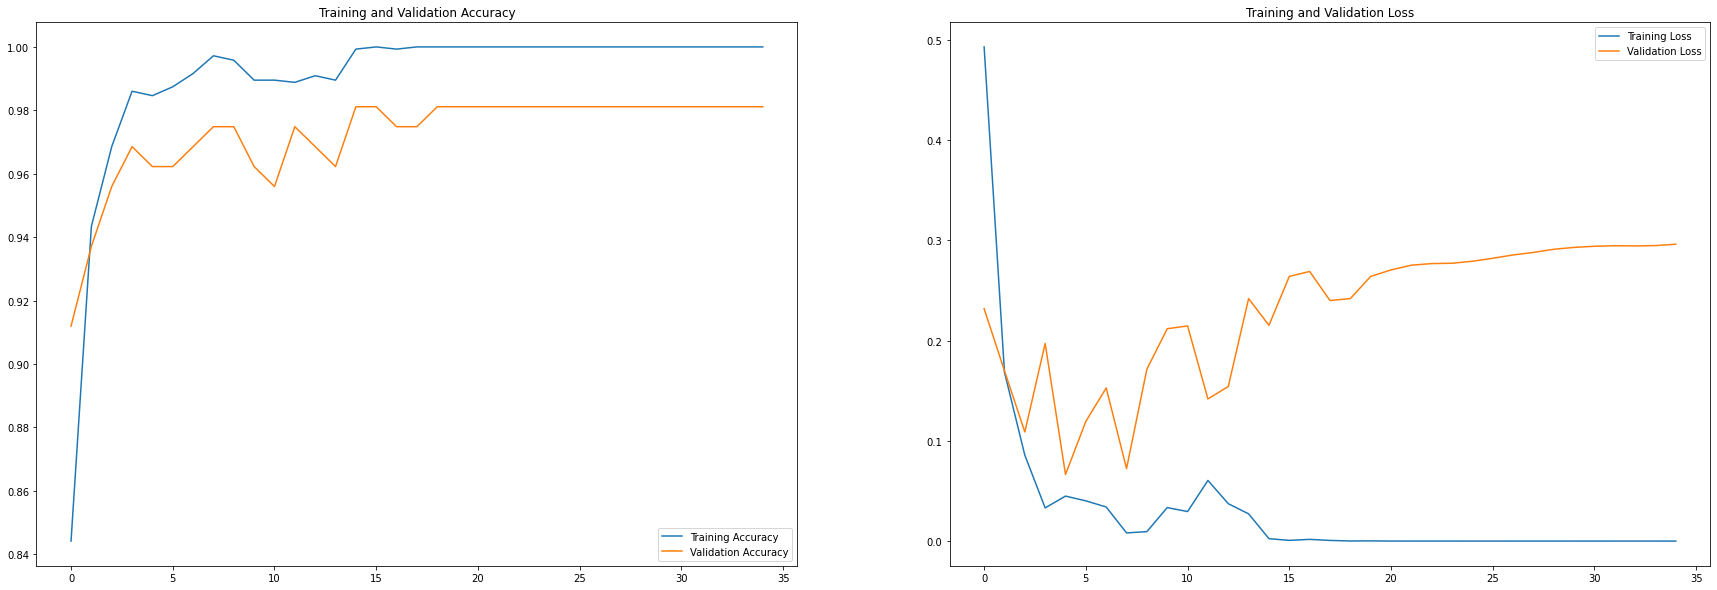

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(35)

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## PREDICTION ON THE TEST DATA

In [ ]:
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions_test = model.predict_on_batch(image_batch).flatten()
print(predictions_test)

[1.00000000e+00 1.01187135e-10 9.99980688e-01 1.93424803e-05
 3.49028968e-15 1.00000000e+00 1.07615392e-06 9.99998927e-01
 1.00000000e+00 3.51681439e-14 5.74382986e-09 1.00000000e+00
 1.00000000e+00 7.42094035e-17 2.92153522e-15 1.00000000e+00
 1.00000000e+00 3.75976449e-37 1.05947516e-15 1.00000000e+00
 1.00000000e+00 6.38187420e-12 2.13624837e-04 9.99786437e-01
 1.00000000e+00 0.00000000e+00 9.99976993e-01 2.30021215e-05
 1.00000000e+00 2.52585141e-38 1.10369444e-06 9.99998927e-01
 1.86435223e-04 9.99813616e-01 2.45993791e-13 1.00000000e+00
 1.00000000e+00 1.00708808e-11 9.99998808e-01 1.16959859e-06
 1.00000000e+00 0.00000000e+00 1.00000000e+00 9.73600991e-11
 1.64582774e-11 1.00000000e+00 9.96959329e-01 3.04068415e-03
 1.00000000e+00 0.00000000e+00 2.53003149e-04 9.99746978e-01
 1.58397956e-14 1.00000000e+00 7.47873637e-19 1.00000000e+00
 1.08463391e-05 9.99989152e-01 1.39622515e-12 1.00000000e+00
 1.00000000e+00 0.00000000e+00 1.00000000e+00 9.61522812e-29]


In [ ]:
# Apply a sigmoid since our model returns logits
predictions_test = tf.nn.sigmoid(predictions_test)
predictions_test = tf.where(predictions_test < 0.5, 0, 1)
print('Predictions:\n', predictions_test.numpy())
print('Labels:\n', label_batch) 

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0]


In [ ]:
probability_model = tf.keras.Sequential([model, 
tf.keras.layers.Softmax()]) 
predictions_test = probability_model.predict(test_data)
# get the labels 
predictions_test = np.array([])
labels_test = np.array([])

for x, y in test_data:
  predictions_test = np.concatenate([predictions_test, np.argmax(model.predict(x), axis=-1)])
  labels_test = np.concatenate([labels_test, y.numpy()]) 

##  CONFUSION MATRIX

In [ ]:
import seaborn as sns


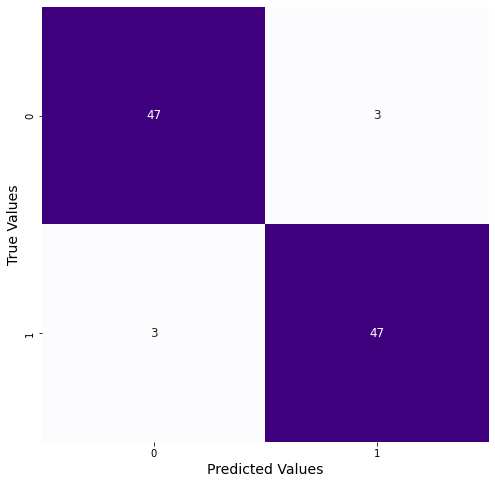

In [ ]:
cm = confusion_matrix(labels_test, predictions_test)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show() 

In [ ]:
class_names  # 0 represent the first  class in the last , 1 second  class and 2 the last class repestively   

['Bent_Tail', 'First _FRII']

   ##  Defining VGG19 Model 

  # splitingg the  data

In [ ]:
image_size = (150, 150)
batch_size = 32

# The tf.keras.preparation keras dataset preprocessing functions help us to access our raw data on disk to a tf.data. 
#An object that can be utilized to train a model is a dataset.
# Therefore we use  a built in function   in Keras to  split our data  into  training and validation 
train_data= tf.keras.preprocessing.image_dataset_from_directory("31",
    shuffle=True,
    validation_split=0.1,
    subset="training",
    seed=1337, 
    image_size=image_size, 
    batch_size=batch_size
    #label_mode = 'categorical'                             
                                                                
                                                                
)
 #  png is the bname of the folder where the  our data is store
    # spliting  the data into into  training  
    #thus we train 80% of our data  and  the remainimg  20% is for  validate

validation_data = tf.keras.preprocessing.image_dataset_from_directory("31",
    shuffle=True,
    validation_split=0.1,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
    #label_mode = 'categorical'
)

test_data = tf.keras.preprocessing.image_dataset_from_directory("3",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
    #label_mode = 'categorical'
)

Found 1590 files belonging to 2 classes.
Using 1431 files for training.
Found 1590 files belonging to 2 classes.
Using 159 files for validation.
Found 100 files belonging to 2 classes.


# standardizing the data

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# configure dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_data = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

# Using Transfer Learning to build a model

In [ ]:
# Modelling WITH Transfer Learning

from tensorflow.keras.applications.vgg19 import VGG19

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (100,100,3)
input_layer=layers.Input(shape=(150,150,3))

base_model= VGG19(weights='imagenet',input_tensor=input_layer,include_top=False)


# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional VGG19 layers
for layer in base_model.layers:
    layer.trainable = False

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
out = base_model.output
out = layers.GlobalAveragePooling2D()(out)
out = layers.Dense(1924)(out) 
out = layers.Dropout(0.5)(out) 
#out = layers.Dense(512)(out) 

predictions = layers.Dense(2, activation='softmax')(out)
model1 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 96)        55392     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 96)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       110720    
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 196)       2

# Compiling and training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='loss',patience=20, restore_best_weights=True) 
#callbacks = [keras.callbacks.ModelCheckpoint(""),]
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
# compile the model
model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',  metrics = ["accuracy"]) # compiile the model 

In [ ]:
hist=model1.fit(train_data,  epochs=25, callbacks=callbacks, validation_data=validation_data) # training the model

Epoch 1/25
45/45 [==============================] - 11s 183ms/step - loss: 0.7516 - accuracy: 0.7086 - val_loss: 0.3175 - val_accuracy: 0.8428
Epoch 2/25
45/45 [==============================] - 5s 106ms/step - loss: 0.4940 - accuracy: 0.8281 - val_loss: 0.2701 - val_accuracy: 0.9057
Epoch 3/25
45/45 [==============================] - 5s 107ms/step - loss: 0.4512 - accuracy: 0.8372 - val_loss: 0.3024 - val_accuracy: 0.8868
Epoch 4/25
45/45 [==============================] - 5s 107ms/step - loss: 0.3818 - accuracy: 0.8567 - val_loss: 0.2593 - val_accuracy: 0.8994
Epoch 5/25
45/45 [==============================] - 5s 107ms/step - loss: 0.3771 - accuracy: 0.8700 - val_loss: 0.2553 - val_accuracy: 0.9057
Epoch 6/25
45/45 [==============================] - 5s 108ms/step - loss: 0.3441 - accuracy: 0.8721 - val_loss: 0.2253 - val_accuracy: 0.9057
Epoch 7/25
45/45 [==============================] - 5s 106ms/step - loss: 0.3669 - accuracy: 0.8602 - val_loss: 0.2357 - val_accuracy: 0.9119
Epoch

In [ ]:
# Getting train accuracy and loss
train_loss, train_acc = model1.evaluate(train_data)
print('Train loss: {} Train Acc: {}'.format(train_loss, train_acc))
print("train_acc : {:5.2f}%".format(100*train_acc))


45/45 [==============================] - 4s 94ms/step - loss: 0.1573 - accuracy: 0.9427
Train loss: 0.15731650590896606 Train Acc: 0.9426974058151245
train_acc : 94.27%


In [ ]:
# Getting test accuracy and loss
val_loss, val_acc = model1.evaluate(validation_data)
print('val loss: {} val Acc: {}'.format(val_loss, val_acc))
print("val_acc : {:5.2f}%".format(100*val_acc)) 

5/5 [==============================] - 0s 95ms/step - loss: 0.2266 - accuracy: 0.9057
val loss: 0.2266225814819336 val Acc: 0.9056603908538818
val_acc : 90.57%


In [ ]:
# Getting test accuracy and loss
test_loss, test_acc = model1.evaluate(test_data)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))
print("test_acc : {:5.2f}%".format(100*test_acc))

4/4 [==============================] - 1s 312ms/step - loss: 0.3224 - accuracy: 0.8700
Test loss: 0.3223686218261719 Test Acc: 0.8700000047683716
test_acc : 87.00%


## Visualazation of  Loss Curves

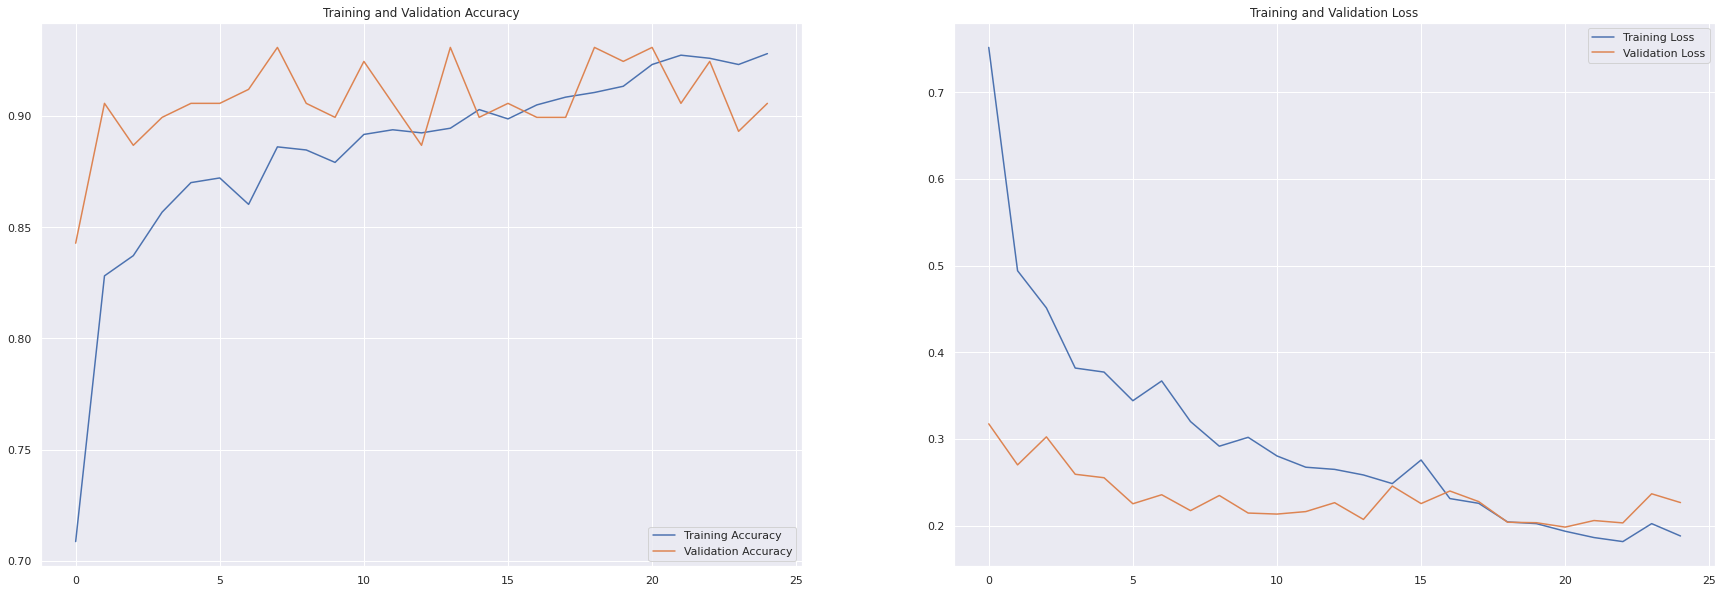

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# predictions

In [ ]:
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions_test = model1.predict_on_batch(image_batch).flatten()
print(predictions_test)

[9.37267303e-01 6.27327189e-02 9.99982715e-01 1.72442960e-05
 5.28973993e-04 9.99471009e-01 8.58102202e-01 1.41897768e-01
 8.23195934e-01 1.76804051e-01 2.89940625e-01 7.10059404e-01
 9.99151230e-01 8.48802389e-04 6.28941366e-03 9.93710637e-01
 9.93063271e-01 6.93670660e-03 5.42044174e-04 9.99458015e-01
 9.99902010e-01 9.79388205e-05 2.19490379e-01 7.80509591e-01
 9.99920130e-01 7.98704132e-05 9.79947567e-01 2.00523827e-02
 9.93543506e-01 6.45655533e-03 6.86452866e-01 3.13547134e-01
 2.43351489e-01 7.56648540e-01 1.38822966e-03 9.98611689e-01
 7.90475190e-01 2.09524870e-01 8.94497395e-01 1.05502605e-01
 9.99643207e-01 3.56732780e-04 9.16666627e-01 8.33333656e-02
 4.47679639e-01 5.52320302e-01 9.79713082e-01 2.02869754e-02
 9.99787390e-01 2.12641884e-04 9.88595426e-01 1.14045581e-02
 1.39503973e-02 9.86049592e-01 1.06998431e-02 9.89300132e-01
 4.63537388e-02 9.53646243e-01 5.47541073e-04 9.99452412e-01
 9.99703348e-01 2.96587561e-04 9.82324243e-01 1.76757146e-02]


In [ ]:
# Apply a sigmoid since our model returns logits
predictions_test = tf.nn.sigmoid(predictions_test)
predictions_test = tf.where(predictions_test < 0.5, 0, 1)
print('Predictions:\n', predictions_test.numpy())
print('Labels:\n', label_batch) 

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0]


In [ ]:
### getting the probability
probability_model = tf.keras.Sequential([model1, 
tf.keras.layers.Softmax()]) 
predictions_test = probability_model.predict(test_data)

In [ ]:
probability_model = tf.keras.Sequential([model1, 
tf.keras.layers.Softmax()]) 
predictions_test = probability_model.predict(test_data)
# get the labels 
predictions_test = np.array([])
labels_test = np.array([])

for x, y in test_data:
  predictions_test = np.concatenate([predictions_test, np.argmax(model1.predict(x), axis=-1)])
  labels_test = np.concatenate([labels_test, y.numpy()]) 

# Confunsion matrix

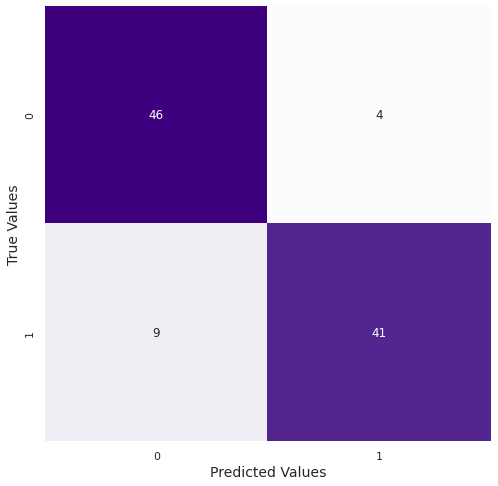

In [ ]:
cm = confusion_matrix(labels_test, predictions_test)
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show() 

In [ ]:
class_names= test_data.class_names
print(class_names) # note zero corrosponds to the first class in the model

['Bent_Tail', 'First _FRII']


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
accuracies = cross_val_score(model1, train_data, validation_data, cv = 5, scoring= "accuracy")

TypeError: ignored

In [ ]:
np.shape(train_data)

()

In [ ]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>